In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 9

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
32/37 [========================>.....] - ETA: 0s - loss: 2.1739 - accuracy: 0.1826 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 1s 7ms/step - loss: 2.1642 - accuracy: 0.1883 - val_loss: 2.0403 - val_accuracy: 0.2575
Epoch 2/1000
32/37 [========================>.....] - ETA: 0s - loss: 2.0301 - accuracy: 0.2637
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 4ms/step - loss: 2.0239 - accuracy: 0.2661 - val_loss: 1.9207 - val_accuracy: 0.2619
Epoch 3/1000
31/37 [========================>.....] - ETA: 0s - loss: 1.9234 - accuracy: 0.2858
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.9176 - accuracy: 0.2886 - val_loss: 1.8084 - val_accuracy: 0.3102
Epoch 4/1000
23/37 [=================>............] - ETA: 0s - loss: 1.8463 - accuracy: 0.3101


27/37 [====================>.........] - ETA: 0s - loss: 1.1622 - accuracy: 0.5686
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 4ms/step - loss: 1.1708 - accuracy: 0.5666 - val_loss: 0.8522 - val_accuracy: 0.7266
Epoch 29/1000
30/37 [=======================>......] - ETA: 0s - loss: 1.1585 - accuracy: 0.5719
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 4ms/step - loss: 1.1653 - accuracy: 0.5676 - val_loss: 0.8418 - val_accuracy: 0.7311
Epoch 30/1000
31/37 [========================>.....] - ETA: 0s - loss: 1.1523 - accuracy: 0.5726
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.1480 - accuracy: 0.5736 - val_loss: 0.8281 - val_accuracy: 0.7533
Epoch 31/1000
30/37 [=======================>......] - ETA: 0s - loss: 1.1591 - accuracy: 0.5638
Epoch 31

32/37 [========================>.....] - ETA: 0s - loss: 1.0176 - accuracy: 0.6316
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.0160 - accuracy: 0.6317 - val_loss: 0.6476 - val_accuracy: 0.8226
Epoch 56/1000
31/37 [========================>.....] - ETA: 0s - loss: 1.0121 - accuracy: 0.6326
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.0064 - accuracy: 0.6334 - val_loss: 0.6460 - val_accuracy: 0.8188
Epoch 57/1000
34/37 [==========================>...] - ETA: 0s - loss: 1.0127 - accuracy: 0.6216
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 1.0131 - accuracy: 0.6204 - val_loss: 0.6467 - val_accuracy: 0.8233
Epoch 58/1000
36/37 [============================>.] - ETA: 0s - loss: 1.0127 - accuracy: 0.6298
Epoch 58

 1/37 [..............................] - ETA: 0s - loss: 1.0428 - accuracy: 0.6406
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9574 - accuracy: 0.6514 - val_loss: 0.5861 - val_accuracy: 0.8601
Epoch 83/1000
35/37 [===========================>..] - ETA: 0s - loss: 0.9554 - accuracy: 0.6647
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9553 - accuracy: 0.6648 - val_loss: 0.5700 - val_accuracy: 0.8671
Epoch 84/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.9480 - accuracy: 0.6622
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9492 - accuracy: 0.6612 - val_loss: 0.5724 - val_accuracy: 0.8633
Epoch 85/1000
 1/37 [..............................] - ETA: 0s - loss: 0.8621 - accuracy: 0.7344
Epoch 85

31/37 [========================>.....] - ETA: 0s - loss: 0.9166 - accuracy: 0.6678
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9202 - accuracy: 0.6667 - val_loss: 0.5418 - val_accuracy: 0.8824
Epoch 110/1000
34/37 [==========================>...] - ETA: 0s - loss: 0.9134 - accuracy: 0.6827
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9069 - accuracy: 0.6868 - val_loss: 0.5345 - val_accuracy: 0.8849
Epoch 111/1000
31/37 [========================>.....] - ETA: 0s - loss: 0.9386 - accuracy: 0.6626
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9306 - accuracy: 0.6660 - val_loss: 0.5386 - val_accuracy: 0.8837
Epoch 112/1000
31/37 [========================>.....] - ETA: 0s - loss: 0.9117 - accuracy: 0.6759
Ep

Epoch 136/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.9009 - accuracy: 0.6866
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9033 - accuracy: 0.6851 - val_loss: 0.5170 - val_accuracy: 0.8926
Epoch 137/1000
30/37 [=======================>......] - ETA: 0s - loss: 0.9068 - accuracy: 0.6734
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9009 - accuracy: 0.6775 - val_loss: 0.5101 - val_accuracy: 0.8938
Epoch 138/1000
31/37 [========================>.....] - ETA: 0s - loss: 0.9131 - accuracy: 0.6772
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.9129 - accuracy: 0.6762 - val_loss: 0.5200 - val_accuracy: 0.8900
Epoch 139/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8973 - accu

Epoch 163/1000
31/37 [========================>.....] - ETA: 0s - loss: 0.9034 - accuracy: 0.6867
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8979 - accuracy: 0.6900 - val_loss: 0.4975 - val_accuracy: 0.8938
Epoch 164/1000
30/37 [=======================>......] - ETA: 0s - loss: 0.8889 - accuracy: 0.6841
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8875 - accuracy: 0.6847 - val_loss: 0.5012 - val_accuracy: 0.8945
Epoch 165/1000
30/37 [=======================>......] - ETA: 0s - loss: 0.8652 - accuracy: 0.7003
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8736 - accuracy: 0.7014 - val_loss: 0.5005 - val_accuracy: 0.8900
Epoch 166/1000
27/37 [====================>.........] - ETA: 0s - loss: 0.8765 - accu

Epoch 190/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8890 - accuracy: 0.6865
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8876 - accuracy: 0.6872 - val_loss: 0.4803 - val_accuracy: 0.9034
Epoch 191/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8741 - accuracy: 0.6953
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8771 - accuracy: 0.6953 - val_loss: 0.4779 - val_accuracy: 0.9053
Epoch 192/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8942 - accuracy: 0.6887
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8935 - accuracy: 0.6921 - val_loss: 0.4927 - val_accuracy: 0.9021
Epoch 193/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8904 - accu

Epoch 217/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8588 - accuracy: 0.7017
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8557 - accuracy: 0.7008 - val_loss: 0.4704 - val_accuracy: 0.9065
Epoch 218/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8717 - accuracy: 0.6992
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8682 - accuracy: 0.6987 - val_loss: 0.4747 - val_accuracy: 0.9053
Epoch 219/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8551 - accuracy: 0.6987
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8557 - accuracy: 0.6961 - val_loss: 0.4687 - val_accuracy: 0.9078
Epoch 220/1000
35/37 [===========================>..] - ETA: 0s - loss: 0.8680 - accu

Epoch 244/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8599 - accuracy: 0.6997
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8542 - accuracy: 0.7021 - val_loss: 0.4634 - val_accuracy: 0.9116
Epoch 245/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8622 - accuracy: 0.7010
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8603 - accuracy: 0.7014 - val_loss: 0.4545 - val_accuracy: 0.9142
Epoch 246/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8886 - accuracy: 0.6984
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8843 - accuracy: 0.7000 - val_loss: 0.4654 - val_accuracy: 0.9148
Epoch 247/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8523 - accu

Epoch 271/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8620 - accuracy: 0.6963
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8581 - accuracy: 0.6974 - val_loss: 0.4629 - val_accuracy: 0.9116
Epoch 272/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8680 - accuracy: 0.7019
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8716 - accuracy: 0.7014 - val_loss: 0.4625 - val_accuracy: 0.9091
Epoch 273/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8672 - accuracy: 0.6936
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8520 - accuracy: 0.6985 - val_loss: 0.4677 - val_accuracy: 0.9142
Epoch 274/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8224 - accu

Epoch 298/1000
 1/37 [..............................] - ETA: 0s - loss: 0.7066 - accuracy: 0.7578
Epoch 298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8423 - accuracy: 0.7082 - val_loss: 0.4535 - val_accuracy: 0.9123
Epoch 299/1000
34/37 [==========================>...] - ETA: 0s - loss: 0.8403 - accuracy: 0.7181
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8394 - accuracy: 0.7180 - val_loss: 0.4436 - val_accuracy: 0.9129
Epoch 300/1000
 1/37 [..............................] - ETA: 0s - loss: 0.9162 - accuracy: 0.6875
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8340 - accuracy: 0.7140 - val_loss: 0.4451 - val_accuracy: 0.9180
Epoch 301/1000
31/37 [========================>.....] - ETA: 0s - loss: 0.8514 - accu

Epoch 325/1000
31/37 [========================>.....] - ETA: 0s - loss: 0.8694 - accuracy: 0.7006
Epoch 325: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8579 - accuracy: 0.7034 - val_loss: 0.4517 - val_accuracy: 0.9180
Epoch 326/1000
36/37 [============================>.] - ETA: 0s - loss: 0.8174 - accuracy: 0.7153
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8125 - accuracy: 0.7163 - val_loss: 0.4376 - val_accuracy: 0.9161
Epoch 327/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8231 - accuracy: 0.7068
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8147 - accuracy: 0.7103 - val_loss: 0.4477 - val_accuracy: 0.9123
Epoch 328/1000
36/37 [============================>.] - ETA: 0s - loss: 0.8370 - accu

Epoch 352/1000
26/37 [====================>.........] - ETA: 0s - loss: 0.8213 - accuracy: 0.7058
Epoch 352: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 4ms/step - loss: 0.8112 - accuracy: 0.7120 - val_loss: 0.4364 - val_accuracy: 0.9243
Epoch 353/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8236 - accuracy: 0.7143
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8194 - accuracy: 0.7146 - val_loss: 0.4328 - val_accuracy: 0.9256
Epoch 354/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8058 - accuracy: 0.7199
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8099 - accuracy: 0.7190 - val_loss: 0.4398 - val_accuracy: 0.9154
Epoch 355/1000
32/37 [========================>.....] - ETA: 0s - loss: 0.8452 - accu

Epoch 379/1000
33/37 [=========================>....] - ETA: 0s - loss: 0.8117 - accuracy: 0.7268
Epoch 379: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8151 - accuracy: 0.7248 - val_loss: 0.4245 - val_accuracy: 0.9193
Epoch 380/1000
37/37 [==============================] - ETA: 0s - loss: 0.8283 - accuracy: 0.7186
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8283 - accuracy: 0.7186 - val_loss: 0.4396 - val_accuracy: 0.9218
Epoch 381/1000
36/37 [============================>.] - ETA: 0s - loss: 0.8208 - accuracy: 0.7164
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 0.8189 - accuracy: 0.7163 - val_loss: 0.4344 - val_accuracy: 0.9193
Epoch 382/1000
35/37 [===========================>..] - ETA: 0s - loss: 0.8328 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.9205


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 75ms/step
[6.2442645e-02 1.0151956e-01 7.3599100e-01 2.0067579e-05 1.2714637e-04
 1.9108376e-02 7.9686224e-02 3.1265433e-04 7.9239375e-04]
2


# 混同行列

50/50 [==============================] - 0s 792us/step


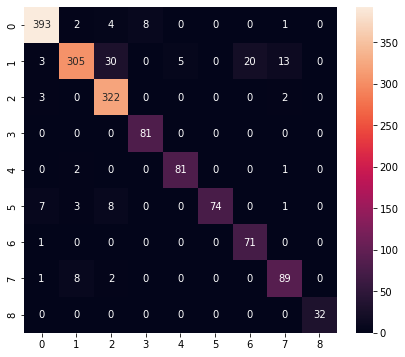

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       408
           1       0.95      0.81      0.88       376
           2       0.88      0.98      0.93       327
           3       0.91      1.00      0.95        81
           4       0.94      0.96      0.95        84
           5       1.00      0.80      0.89        93
           6       0.78      0.99      0.87        72
           7       0.83      0.89      0.86       100
           8       1.00      1.00      1.00        32

    accuracy                           0.92      1573
   macro avg       0.92      0.93      0.92      1573
weighted avg       0.93      0.92      0.92      1573



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\nicho\AppData\Local\Temp\tmplvnd__ru\assets


6764

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 996 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.2442657e-02 1.0151947e-01 7.3599106e-01 2.0067502e-05 1.2714624e-04
 1.9108359e-02 7.9686202e-02 3.1265357e-04 7.9239224e-04]
2
